In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:

df.isnull().sum()

In [6]:
df.shape # Get the number of rows and columns
df.shape[0] # Get the number of rows only
df.shape[1] # Get the number of columns only
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(768, 9)
768
9


In [7]:
df[['Pregnancies', 'Outcome']] #multiple isolation
df[df.index==1] # single isolation by index
df[df.index.isin(range(2,10))] # multiple isolation by index

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df3 = df.copy()
df3 = df3.dropna()
df3.shape

(768, 9)

In [9]:
df3.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [11]:
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [12]:
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: >

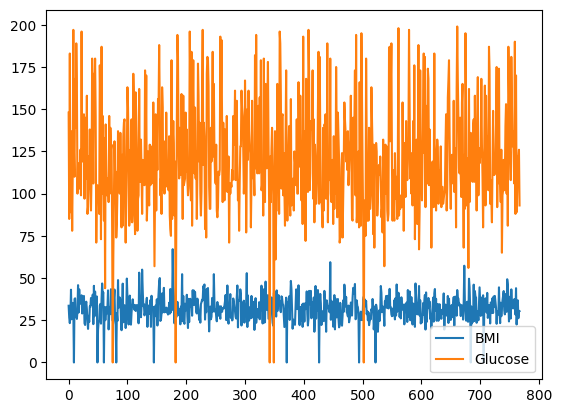

In [15]:
df[['BMI', 'Glucose']].plot.line()

<Axes: >

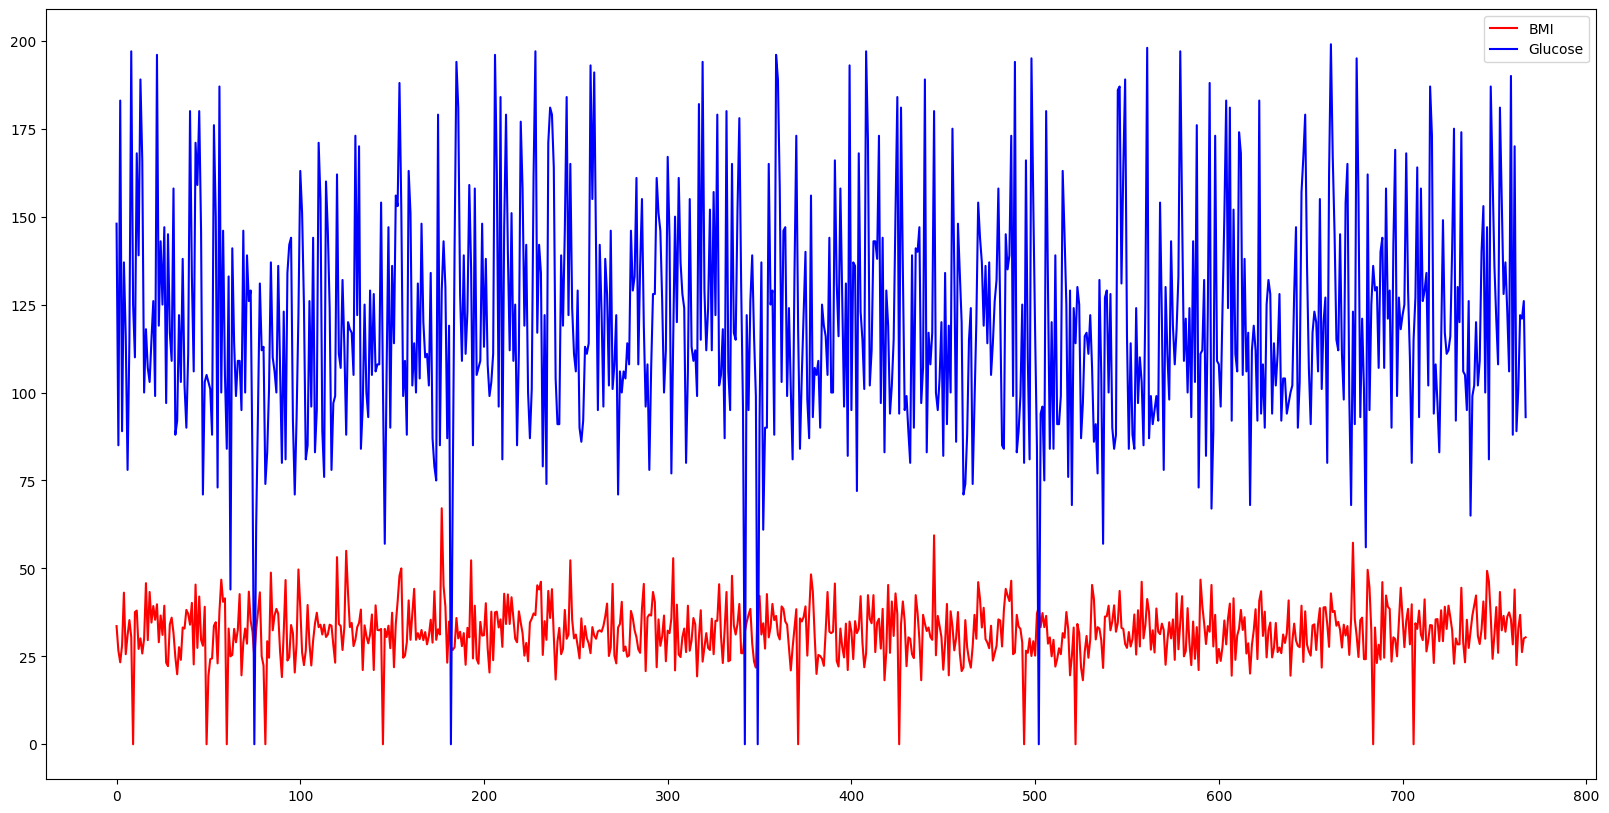

In [16]:
df[['BMI', 'Glucose']].plot.line(figsize=(20, 10), 
                                 color={"BMI": "red", "Glucose": "blue"})

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

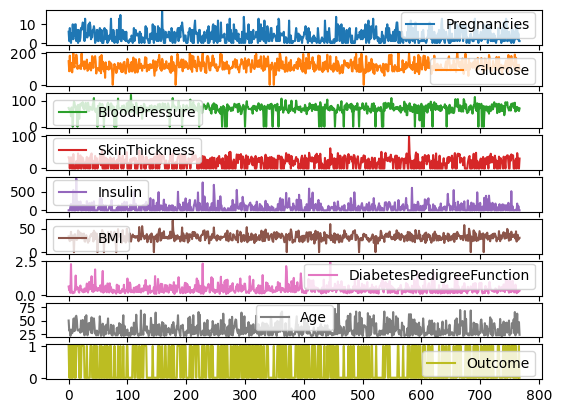

In [17]:
df.plot.line(subplots=True)

<Axes: xlabel='Outcome'>

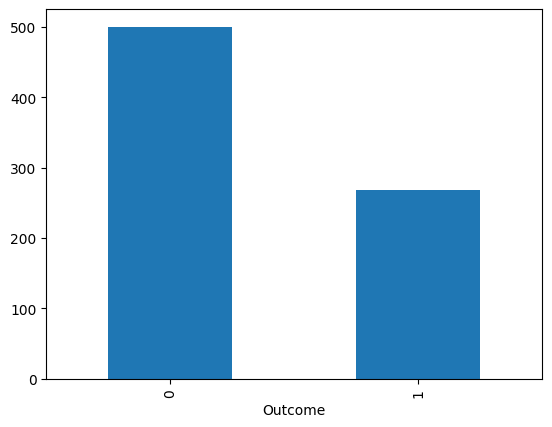

In [18]:
df['Outcome'].value_counts().plot.bar()

<Axes: title={'center': 'BMI'}, xlabel='Outcome'>

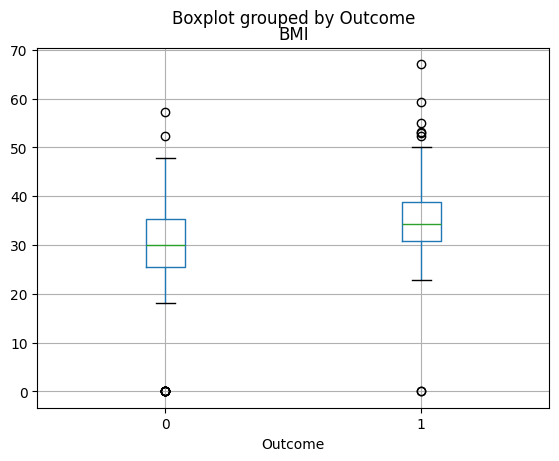

In [19]:
df.boxplot(column=['BMI'], by='Outcome')

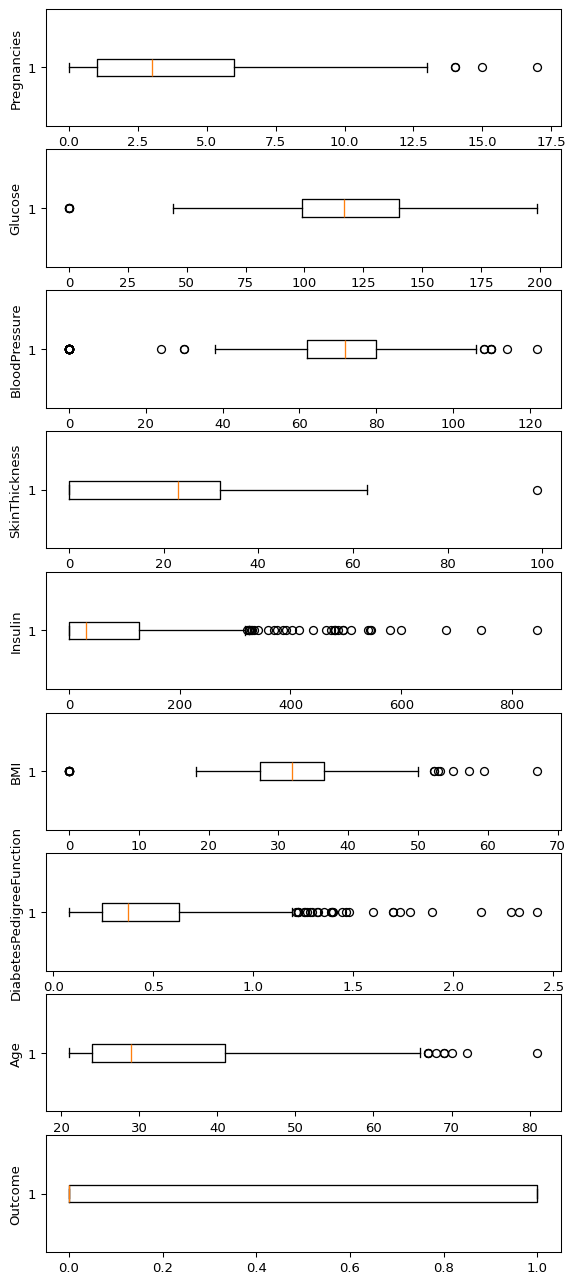

In [20]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [73]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound) 
                & (df['Insulin'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound) 
                        & (clean_data['Pregnancies'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound) 
                        & (clean_data['Age'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) 
                        & (clean_data['Glucose'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound) 
                        & (clean_data['BloodPressure'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) 
                        & (clean_data['BMI'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
 
# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound) 
                        & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]

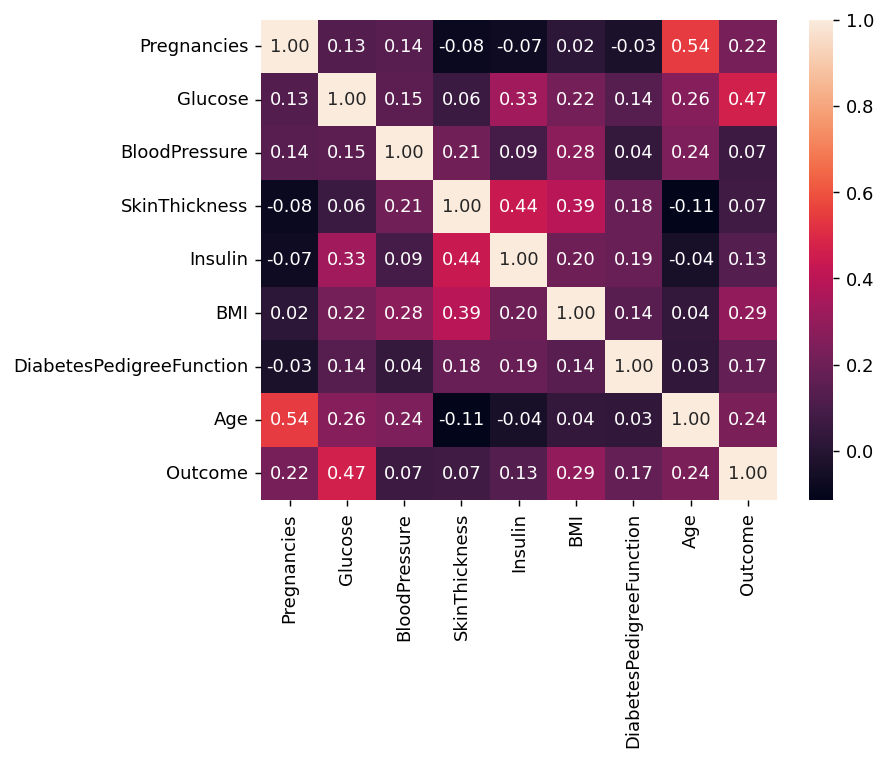

In [21]:


#correlation
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [22]:

corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

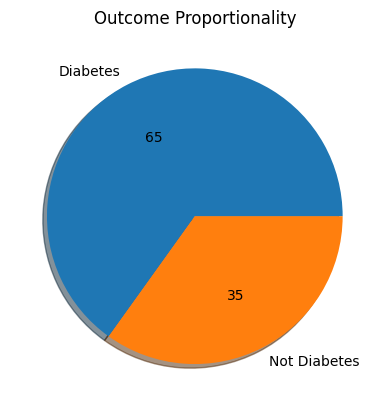

In [23]:
plt.pie(df.Outcome.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()